In [2]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import pickle
from dask.diagnostics import ProgressBar
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dock = pd.read_csv('../data/stations_cleaned.csv.gz')

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
dock.head(10)

,dock_id,dock_name,date,hour,minute,avail_bikes,avail_docks,tot_docks,_lat,_long,in_service,status_key,dock_status,time,dayofweek,dayofweek2,season
0,72,W 52 St & 11 Ave,2015-03-01,1,6,8,31,39,40.767272,-73.993929,1,1,Empty Alert,1:6,6,Sunday,spring
1,72,W 52 St & 11 Ave,2015-03-01,1,16,8,31,39,40.767272,-73.993929,1,1,Empty Alert,1:16,6,Sunday,spring
2,72,W 52 St & 11 Ave,2015-03-01,1,25,8,30,38,40.767272,-73.993929,1,1,Empty Alert,1:25,6,Sunday,spring
3,72,W 52 St & 11 Ave,2015-03-01,1,35,8,30,38,40.767272,-73.993929,1,1,Empty Alert,1:35,6,Sunday,spring
4,72,W 52 St & 11 Ave,2015-03-01,1,45,8,30,38,40.767272,-73.993929,1,1,Empty Alert,1:45,6,Sunday,spring
5,72,W 52 St & 11 Ave,2015-03-01,1,54,7,31,38,40.767272,-73.993929,1,1,Empty Alert,1:54,6,Sunday,spring
6,72,W 52 St & 11 Ave,2015-03-01,2,2,8,31,39,40.767272,-73.993929,1,1,Empty Alert,2:2,6,Sunday,spring
7,72,W 52 St & 11 Ave,2015-03-01,2,13,8,31,39,40.767272,-73.993929,1,1,Empty Alert,2:13,6,Sunday,spring
8,72,W 52 St & 11 Ave,2015-03-01,2,22,8,31,39,40.767272,-73.993929,1,1,Empty Alert,2:22,6,Sunday,spring
9,72,W 52 St & 11 Ave,2015-03-01,2,32,8,31,39,40.767272,-73.993929,1,1,Empty Alert,2:32,6,Sunday,spring


In [4]:
dock.dtypes

dock_id          int64
dock_name       object
date            object
hour             int64
minute           int64
avail_bikes      int64
avail_docks      int64
tot_docks        int64
_lat           float64
_long          float64
in_service       int64
status_key      object
dock_status     object
time            object
dayofweek        int64
dayofweek2      object
season          object
dtype: object

In [6]:
dock.isnull().sum()

dock_id        0
dock_name      0
date           0
hour           0
minute         0
avail_bikes    0
avail_docks    0
tot_docks      0
_lat           0
_long          0
in_service     0
status_key     0
dock_status    0
time           0
dayofweek      0
dayofweek2     0
season         0
dtype: int64

In [4]:
dock['date'] = pd.to_datetime(dock['date'])
dock['date_time'] = dock['date'].dt.strftime('%Y-%m-%d')

print('completed')

dock['date_time'] = pd.to_datetime(dock['date_time'])
dock['month'] = dock['date'].dt.strftime('%Y-%m')

print('completed')

dock['day_of_week3'] = dock['date'].dt.day_name()
dock['datehour'] = dock['date'].dt.hour

print('completed')

dock['year'] = dock['date'].dt.strftime('%Y')
dock['month2'] = dock.date.dt.month.apply(lambda x: 'Jan' if x == 1 else 'Feb' if x == 2 else \
    'Mar' if x == 3 else 'Apr' if x == 4 else 'May' if x == 5 else 'Jun' if x == 6 else 'Jul' if x == 7 else \
    'Aug' if x == 8 else 'Sep' if x == 9 else 'Oct' if x == 10 else 'Nov' if x == 11 else 'Dec' )

print('completed')

dock['weekdays'] = dock.date.dt.weekday.apply(lambda x: 'Weekdays' if x <= 5 else 'Weekend')


completed
completed
completed
completed


In [11]:
dock.head(10)

,dock_id,dock_name,date,hour,minute,avail_bikes,avail_docks,tot_docks,_lat,_long,...,dayofweek,dayofweek2,season,date_time,month,day_of_week3,datehour,year,month2,weekdays
0,72,W 52 St & 11 Ave,2015-03-01,1,6,8,31,39,40.767272,-73.993929,...,6,Sunday,spring,2015-03-01,2015-03,Sunday,0,2015,Mar,Weekend
1,72,W 52 St & 11 Ave,2015-03-01,1,16,8,31,39,40.767272,-73.993929,...,6,Sunday,spring,2015-03-01,2015-03,Sunday,0,2015,Mar,Weekend
2,72,W 52 St & 11 Ave,2015-03-01,1,25,8,30,38,40.767272,-73.993929,...,6,Sunday,spring,2015-03-01,2015-03,Sunday,0,2015,Mar,Weekend
3,72,W 52 St & 11 Ave,2015-03-01,1,35,8,30,38,40.767272,-73.993929,...,6,Sunday,spring,2015-03-01,2015-03,Sunday,0,2015,Mar,Weekend
4,72,W 52 St & 11 Ave,2015-03-01,1,45,8,30,38,40.767272,-73.993929,...,6,Sunday,spring,2015-03-01,2015-03,Sunday,0,2015,Mar,Weekend
5,72,W 52 St & 11 Ave,2015-03-01,1,54,7,31,38,40.767272,-73.993929,...,6,Sunday,spring,2015-03-01,2015-03,Sunday,0,2015,Mar,Weekend
6,72,W 52 St & 11 Ave,2015-03-01,2,2,8,31,39,40.767272,-73.993929,...,6,Sunday,spring,2015-03-01,2015-03,Sunday,0,2015,Mar,Weekend
7,72,W 52 St & 11 Ave,2015-03-01,2,13,8,31,39,40.767272,-73.993929,...,6,Sunday,spring,2015-03-01,2015-03,Sunday,0,2015,Mar,Weekend
8,72,W 52 St & 11 Ave,2015-03-01,2,22,8,31,39,40.767272,-73.993929,...,6,Sunday,spring,2015-03-01,2015-03,Sunday,0,2015,Mar,Weekend
9,72,W 52 St & 11 Ave,2015-03-01,2,32,8,31,39,40.767272,-73.993929,...,6,Sunday,spring,2015-03-01,2015-03,Sunday,0,2015,Mar,Weekend


In [69]:
 daily_bikes = dock.groupby(['year','month']).agg({'avail_bikes':'mean', 'avail_docks':'mean','tot_docks':'mean'}).reset_index()

In [70]:
daily_bikes.rename(columns={'avail_bikes':'avg_available_bikes', 'avail_docks':'avg_bikes_Used','tot_docks':'avg_total_docks'}, inplace=True)

In [76]:
daily_bikes

,year,month,avg_available_bikes,avg_bikes_Used,avg_total_docks
0,2015,2015-03,9.162982,24.658533,33.408434
1,2015,2015-04,10.113601,23.132088,31.314559
2,2015,2015-05,9.857451,22.920303,34.573922
3,2015,2015-06,12.485816,20.563575,34.622753
4,2015,2015-07,14.340565,19.172525,34.982550
5,2015,2015-08,10.145949,13.698729,24.983342
6,2015,2015-09,11.422714,17.302737,30.008910
7,2015,2015-10,11.801614,18.670322,31.579229
8,2015,2015-11,11.431788,19.647582,32.188384
9,2015,2015-12,10.481600,20.336102,31.333930


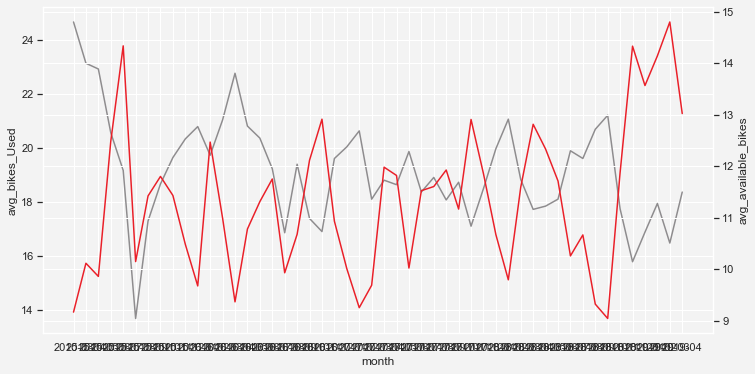

In [31]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3'})
colors = ["#39a2e1","#263571","#343335","#7a6155","#8e8c8e","#60645f","#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.subplots(figsize = (12,6))
fig = sns.lineplot(x = "month", y = "avg_bikes_Used", color = '#8e8c8e', data = daily_bikes)
ax2 = plt.twinx()
sns.lineplot(x = 'month', y = 'avg_available_bikes', color = '#ea2029', data = daily_bikes)


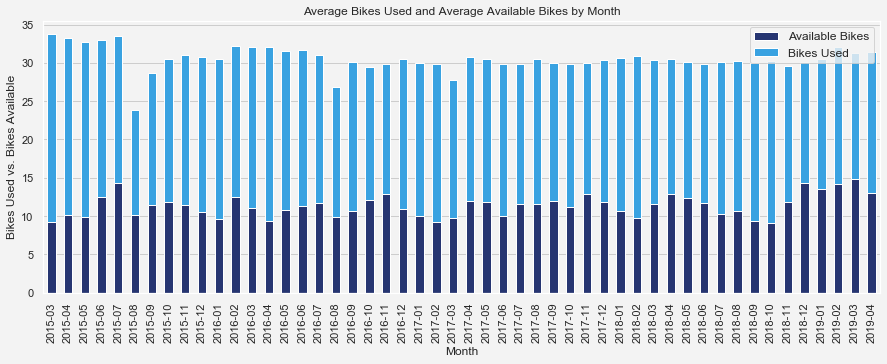

In [95]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571","#39a2e1","#39a2e1","#7a6155","#8e8c8e","#60645f","#ea2029"]
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots()
daily_bikes.plot(kind='bar', stacked=True, y=['avg_available_bikes','avg_bikes_Used'],\
                    x='month', ax=ax, figsize=(15,5))
ax.set_title('Average Bikes Used and Average Available Bikes by Month', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Bikes Used vs. Bikes Available', fontsize=12)
ax.legend(['Available Bikes','Bikes Used'], loc = 'upper right', fontsize=12, )
ax.xaxis.grid(False)

#### Engineer a new feature - usage_rate

In [87]:
daily_bikes['Usage Rate'] = daily_bikes['avg_bikes_Used']/(daily_bikes['avg_total_docks'])

(0.4, 0.8)

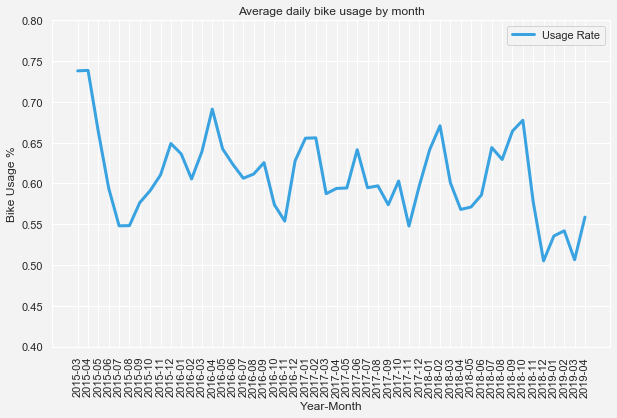

In [88]:
fig, ax = plt.subplots()
daily_bikes.plot(kind='line', x='month', y='Usage Rate', linewidth = 3.0, ax=ax, figsize=(10,6))
ax.set_title('Average daily bike usage by month', fontsize=12)
#ax.set_title('Average daily bike usage by month', fontsize=12, fontweight='bold')
ax.set_xlabel('Year-Month', fontsize=12)
ax.set_ylabel('Bike Usage %', fontsize=12)
ax.set_xticks(np.arange(len(daily_bikes['month'])))
ax.set_xticklabels(daily_bikes['month'], rotation=90)
plt.ylim((0.4,0.8))

Text(0, 0.5, 'Bike Usage Rate')

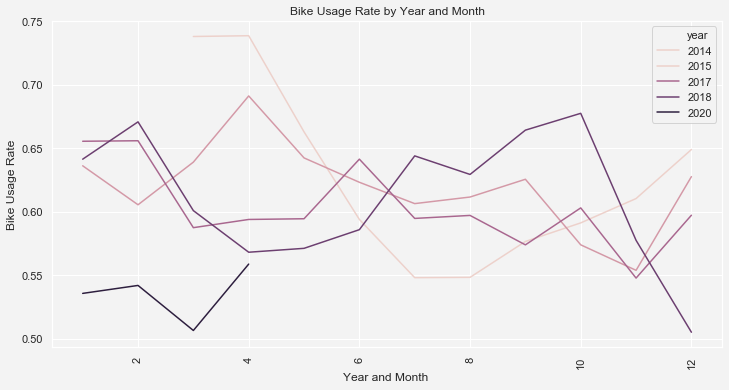

In [72]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3'})
colors = ["#39a2e1","#263571","#343335","#7a6155","#8e8c8e","#ea2029","#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.subplots(figsize = (12,6))
fig = sns.lineplot(x = "Month", y = "usage_rate", hue = 'year', \
                   hue_order = ['2015','2016','2017','2018','2019'], data = daily_bikes)
plt.xticks(rotation=90)
fig.set_title('Bike Usage Rate by Year and Month', fontsize=12)
fig.set_xlabel('Year and Month ', fontsize=12)
fig.set_ylabel('Bike Usage Rate', fontsize=12)

In [60]:
# dock["Month"] = pd.to_datetime(dock['date'], format='%b', errors='coerce').dt.month

In [90]:
dock_hour = dock.groupby('hour').agg({'avail_bikes':'mean', 'avail_docks':'mean', 'tot_docks':'mean'}).reset_index()
dock_hour.rename(columns={'avail_bikes':'avg_bikes_avail', 'avail_docks':'avg_bikes_used', 'tot_docks':'avg_docks'}, inplace=True)
dock_hour.sort_values('hour', ascending=True, inplace=True)
dock_hour['usage_rate'] = dock_hour['avg_bikes_used']/(dock_hour['avg_docks'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

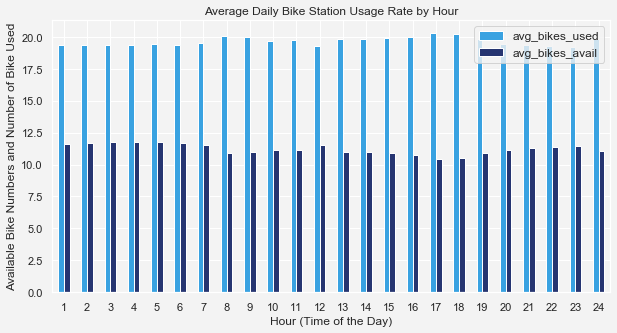

In [97]:
fig, ax = plt.subplots()
dock_hour.plot(kind='bar', stacked=False, y=['avg_bikes_used','avg_bikes_avail'],\
                    x='hour', ax=ax, figsize=(10,5))
ax.set_title('Average Daily Bike Station Usage Rate by Hour', fontsize=12)
ax.set_xlabel('Hour (Time of the Day)', fontsize=12)
ax.set_ylabel('Available Bike Numbers and Number of Bike Used', fontsize=12)
ax.legend(fontsize=12, loc='upper right')
plt.xticks(rotation=360)

(0.58, 0.66)

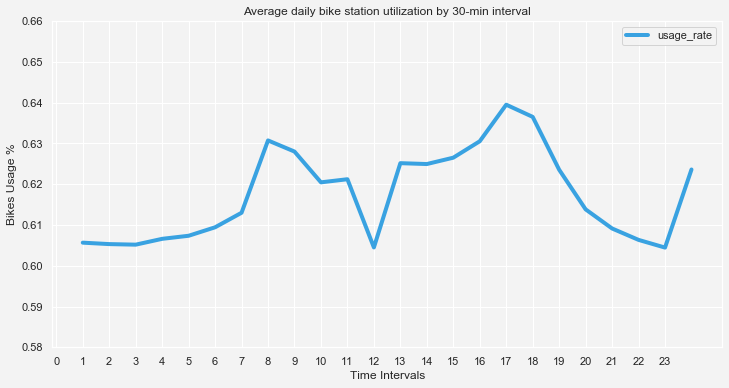

In [103]:
fig, ax = plt.subplots()
dock_hour.plot(kind = 'line', x = 'hour', y = 'usage_rate', linewidth = 4.0, ax=ax, figsize=(12,6))
ax.set_title('Average daily bike station utilization by 30-min interval', fontsize=12)
ax.set_xlabel('Time Intervals', fontsize=12)
ax.set_ylabel('Bikes Usage %', fontsize=12)
ax.set_xticks(np.arange(len(dock_hour['hour'])))
plt.ylim((0.58,0.66))

#### Weekdays

In [6]:
weekdays_df = dock[dock['dayofweek'].isin([1,2,3,4,5])]
weekdays_df = weekdays_df.groupby('hour').agg({'avail_bikes':'mean', 'avail_docks':'mean', 'tot_docks':'mean'}).reset_index()
weekdays_df.rename(columns={'avail_bikes':'avg_avail_bikes', 'avail_docks':'avg_bike_used', 'tot_docks':'avg_docks'}, inplace=True)
weekdays_df.sort_values('hour', ascending=True, inplace=True)
weekdays_df['Usage Rate'] = weekdays_df['avg_bike_used']/(weekdays_df['avg_docks'])

In [8]:
weekdays_df.head(5)

,hour,avg_avail_bikes,avg_bike_used,avg_docks,Usage Rate
0,1,11.574549,19.369186,31.930149,0.606611
1,2,11.623449,19.397870,31.942188,0.607281
2,3,11.677833,19.418349,31.961683,0.607551
3,4,11.711457,19.472452,31.962542,0.609227
4,5,11.696114,19.495146,31.933190,0.610498


In [11]:
weekends_df = dock[dock['dayofweek'].isin([5,6])]
weekends_df = weekends_df.groupby('hour').agg({'avail_bikes':'mean', 'avail_docks':'mean', 'tot_docks':'mean'}).reset_index()
weekends_df.rename(columns={'avail_bikes':'avg_avail_bikes', 'avail_docks':'avg_bike_used', 'tot_docks':'avg_docks'}, inplace=True)
weekends_df.sort_values('hour', ascending=True, inplace=True)
weekends_df['Usage Rate'] = weekends_df['avg_bike_used']/(weekends_df['avg_docks'])

In [12]:
weekends_df.head(5)

,hour,avg_avail_bikes,avg_bike_used,avg_docks,Usage Rate
0,1,11.634648,19.264877,31.933205,0.603287
1,2,11.788060,19.190474,31.974363,0.600183
2,3,11.867418,19.118343,31.909397,0.599145
3,4,11.867497,19.153362,31.921810,0.600009
4,5,11.914582,19.171529,31.962482,0.599814


In [14]:
weekdays = weekdays_df.rename(columns={'Usage Rate':'Weekday'})
weekends = weekends_df.rename(columns={'Usage Rate':'Weekend'})
weekdays_weekends = pd.concat([weekdays, weekends], axis=1)

In [27]:
weekdays_weekends

,hour,avg_avail_bikes,avg_bike_used,avg_docks,Weekday,hour,avg_avail_bikes,avg_bike_used,avg_docks,Weekend
0,1,11.574549,19.369186,31.930149,0.606611,1,11.634648,19.264877,31.933205,0.603287
1,2,11.623449,19.397870,31.942188,0.607281,2,11.788060,19.190474,31.974363,0.600183
2,3,11.677833,19.418349,31.961683,0.607551,3,11.867418,19.118343,31.909397,0.599145
3,4,11.711457,19.472452,31.962542,0.609227,4,11.867497,19.153362,31.921810,0.600009
4,5,11.696114,19.495146,31.933190,0.610498,5,11.914582,19.171529,31.962482,0.599814
5,6,11.554772,19.463476,31.776447,0.612513,6,11.898936,19.219735,31.939093,0.601762
6,7,11.338697,19.667058,31.769100,0.619063,7,12.023888,19.059480,31.871265,0.598015
7,8,10.548945,20.379838,31.748508,0.641915,8,11.757699,19.206139,31.815399,0.603674
8,9,10.686468,20.223034,31.783166,0.636281,9,11.617814,19.342646,31.815312,0.607967
9,10,11.114647,19.729523,31.754032,0.621323,10,11.215072,19.636218,31.759562,0.618277


In [25]:
weekdays_weekends['hour'] = weekdays_weekends['hour'].astype('str')

In [86]:
dayofweek = dock.groupby(['weekdays','hour']).agg({'avail_bikes':'mean', 'avail_docks':'mean', 'tot_docks':'mean'}).reset_index()
dayofweek.rename(columns={'avail_bikes':'avg_avail_bikes', 'avail_docks':'avg_bike_used', 'tot_docks':'avg_docks'}, inplace=True)


In [87]:
dayofweek.sort_values('hour', ascending=True, inplace=True)
dayofweek['Usage Rate'] = dayofweek['avg_bike_used']/(dayofweek['avg_docks'])

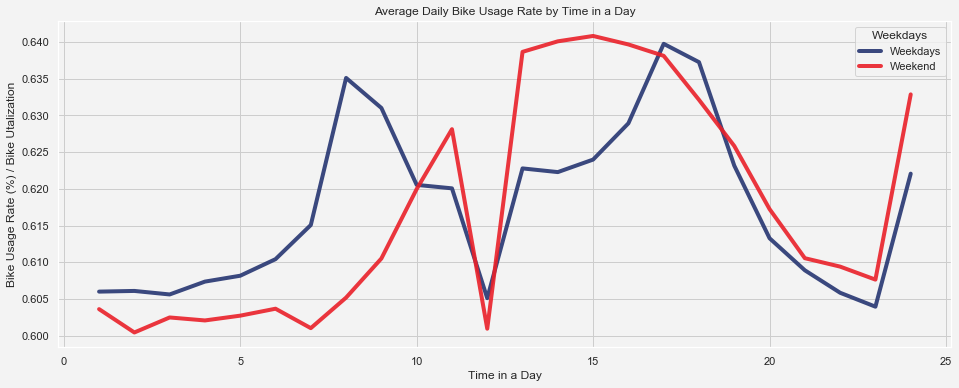

In [91]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571","#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (16,6))
fig = sns.lineplot(x = 'hour', y = 'Usage Rate', hue = 'weekdays', data = dayofweek, alpha = 0.9,linewidth = 4.0)
fig.set_title('Average Daily Bike Usage Rate by Time in a Day', fontsize=12)
fig.set_xlabel('Time in a Day', fontsize=12)
fig.set_ylabel('Bike Usage Rate (%) / Bike Utalization', fontsize=12)
plt.legend(['Weekdays','Weekend'],
           title = 'Weekdays')

In [47]:
dock['season'] = dock.date.dt.month.apply(lambda x: 'winter' if x <= 2 else 'spring' if x <= 5 else \
    'summer' if x <= 8 else 'fall' if x <= 11 else 'winter')

In [50]:
season_df = dock.groupby(['season','hour']).agg({'avail_bikes':'mean', 'avail_docks':'mean', 'tot_docks':'mean'}).reset_index()
season_df.rename(columns={'avail_bikes':'avg_avail_bikes', 'avail_docks':'avg_bike_used', 'tot_docks':'avg_docks'}, inplace=True)
season_df.sort_values('hour', ascending=True, inplace=True)
season_df['Usage Rate'] = season_df['avg_bike_used']/(season_df['avg_docks'])

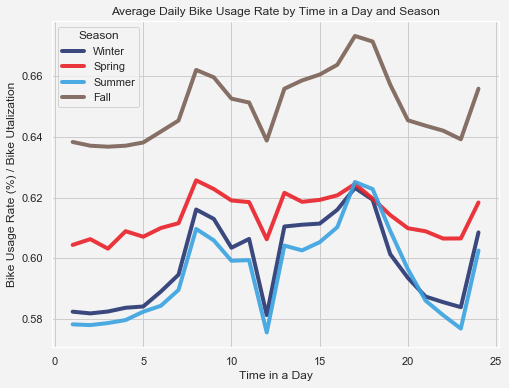

In [90]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571","#ea2029","#39a2e1","#7a6155"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (8,6))
fig = sns.lineplot(x = 'hour', y = 'Usage Rate', hue = 'season', data = season_df, alpha = 0.9,linewidth = 4.0)
fig.set_title('Average Daily Bike Usage Rate by Time in a Day and Season', fontsize=12)
fig.set_xlabel('Time in a Day', fontsize=12)
fig.set_ylabel('Bike Usage Rate (%) / Bike Utalization', fontsize=12)
plt.legend(['Winter','Spring','Summer','Fall'],
           title = 'Season')

In [62]:
dock_status_df = dock.groupby(['hour','dock_status'])[['dock_status']].count().rename(columns={'dock_status':'count'}).reset_index()

In [63]:
dock_status_df

,hour,dock_status,count
0,1,Empty Alert,646936
1,1,Full Alert,285354
2,1,Healthy,446298
3,2,Empty Alert,657455
4,2,Full Alert,294395
...,...,...,...
67,23,Full Alert,275610
68,23,Healthy,444324
69,24,Empty Alert,708349
70,24,Full Alert,241555


Text(0, 0.5, 'Number of Stations')

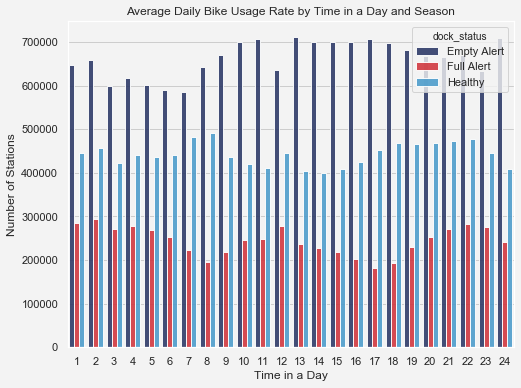

In [94]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571","#ea2029","#39a2e1","#7a6155"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (8,6))
fig = sns.barplot(x = 'hour', y = 'count', hue = 'dock_status', data = dock_status_df, alpha = 0.9)
fig.set_title('Average Daily Bike Usage Rate by Time in a Day and Season', fontsize=12)
fig.set_xlabel('Time in a Day', fontsize=12)
fig.set_ylabel('Number of Stations', fontsize=12)